## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## **Loading Dataset**

In [ ]:
file = "/content/Carbon_Emission_Data.csv"
df = pd.read_csv(file)

df.head()

,Diet,Heating Energy Source,Transport,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Weekly Count,Weekly Electricity Usage,Carbon_Emission
0,pescatarian,coal,public,230,frequently,210,4,56,447.6
1,vegetarian,natural gas,walk/bicycle,114,rarely,9,3,98,378.4
2,omnivore,wood,private,138,never,2472,1,140,519.0
3,omnivore,wood,walk/bicycle,157,rarely,74,3,189,214.8
4,vegetarian,coal,private,266,very frequently,8457,1,63,948.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Diet                           10000 non-null  object 
 1   Heating Energy Source          10000 non-null  object 
 2   Transport                      10000 non-null  object 
 3   Monthly Grocery Bill           10000 non-null  int64  
 4   Frequency of Traveling by Air  10000 non-null  object 
 5   Vehicle Monthly Distance Km    10000 non-null  int64  
 6   Waste Bag Weekly Count         10000 non-null  int64  
 7   Weekly Electricity Usage       10000 non-null  int64  
 8   Carbon_Emission                10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


## **Data Preprocessing**

## Missing Data handling

In [ ]:
df.replace(np.nan, 'None', inplace=True)

## Checking if there are any null values remaining

In [ ]:
df.isna().sum()

,0
Diet,0
Heating Energy Source,0
Transport,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0
Vehicle Monthly Distance Km,0
Waste Bag Weekly Count,0
Weekly Electricity Usage,0
Carbon_Emission,0


In [ ]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,Weekly Electricity Usage,Carbon_Emission
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,173.875200,2031.485900,4.024600,168.19810,453.829460
std,72.234018,2769.715597,1.990375,71.44189,203.535049
min,50.000000,0.000000,1.000000,0.00000,61.200000
25%,111.000000,69.000000,2.000000,119.00000,307.600000
50%,173.000000,823.000000,4.000000,168.00000,416.000000
75%,237.000000,2516.750000,6.000000,217.00000,553.600000
max,299.000000,9999.000000,7.000000,336.00000,1675.400000


## Label Encoding (Converting Categorical Values to Numerical)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for c in cat_cols:
    df[c] = label_encoder.fit_transform(df[c])

## **Correlation Analysis**

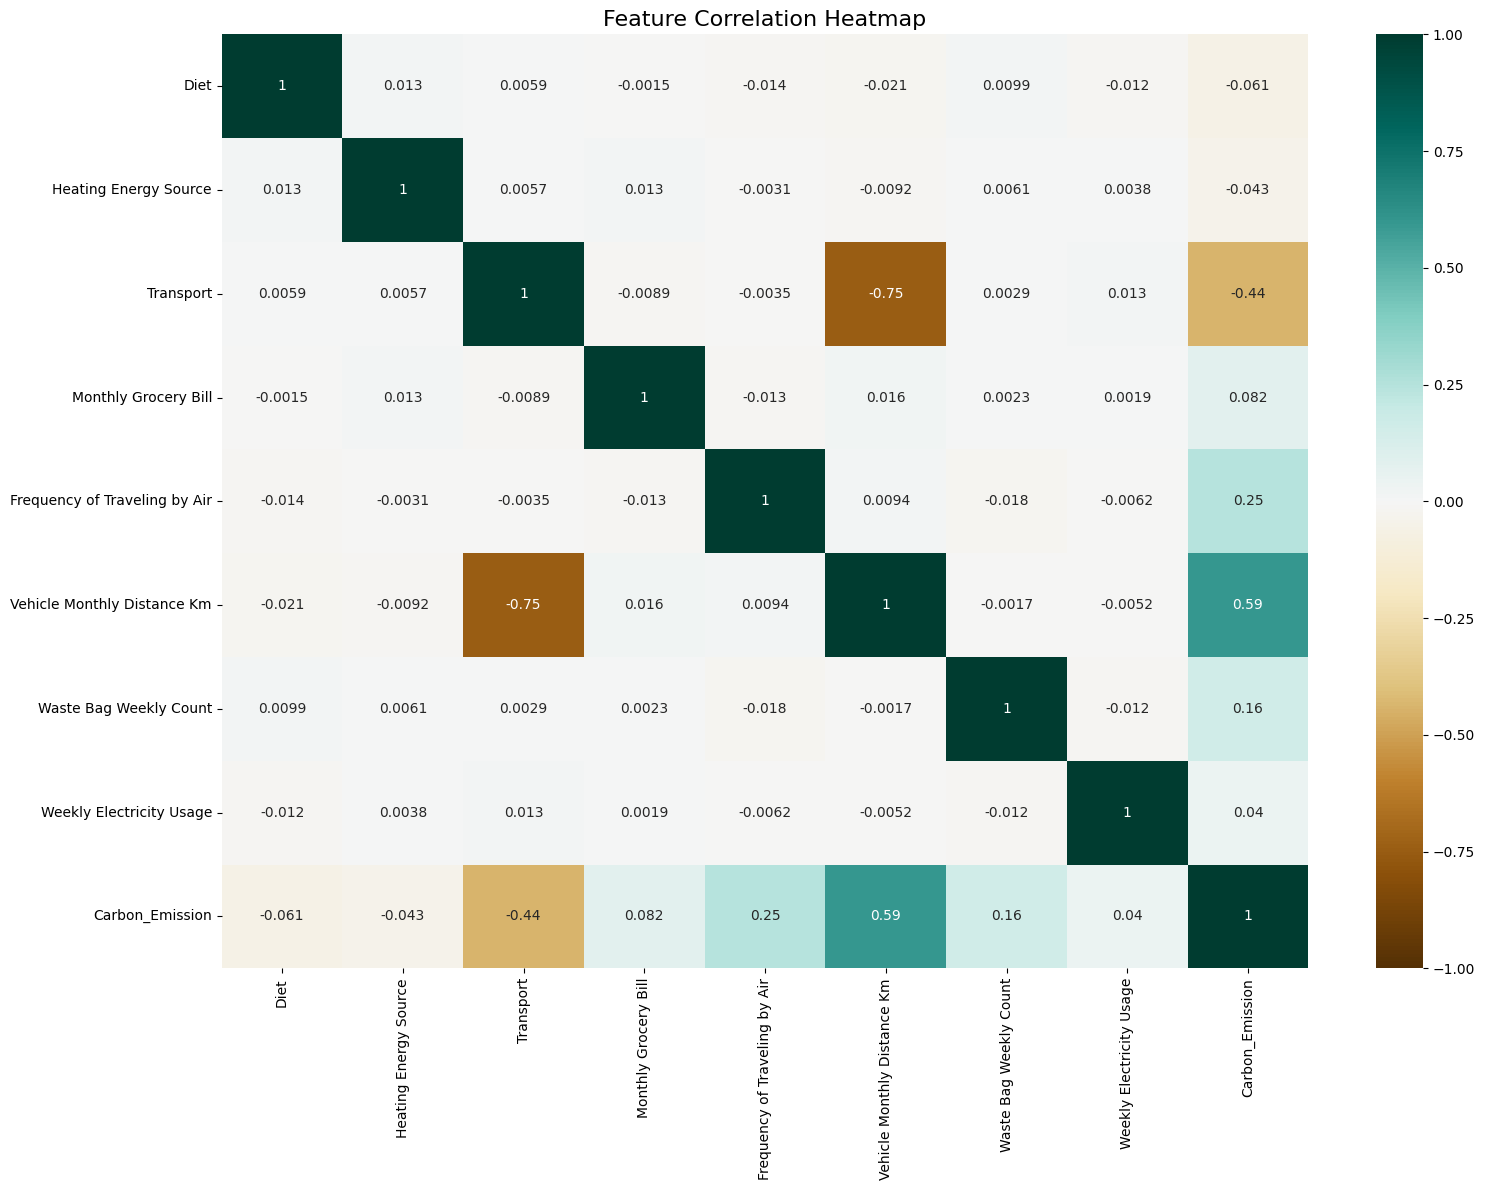

In [ ]:
correlations = df.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Splitting data into Training & Testing**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Model Training & Evaluation**

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)}

MSE = {}
R2 = {}
MAE = {}
preds = {}

for i, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds[i] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    MSE[i] = mse
    R2[i] = r2
    MAE[i] = mae
    print(f"{i} -> MSE: {mse:.4f}, R² Score: {r2:.4f}, MAE: {mae:.4f}")

Linear Regression -> MSE: 22271.9085, R² Score: 0.4645, MAE: 116.9935
Decision Tree -> MSE: 30161.5925, R² Score: 0.2748, MAE: 123.0593
Random Forest -> MSE: 15511.6998, R² Score: 0.6270, MAE: 89.0394


## **Data Visualization**

## Actual vs Predicted Plot

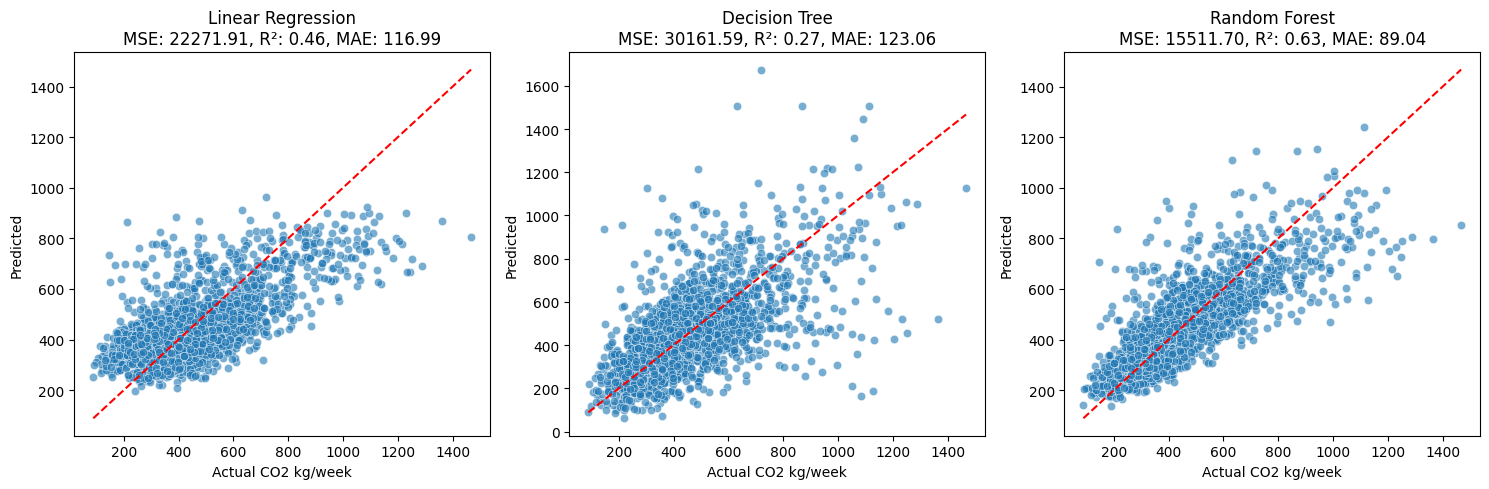

In [ ]:
plt.figure(figsize=(15, 5))
for k, name in enumerate(models.keys()):
    plt.subplot(1, 3, k+1)
    sns.scatterplot(x=y_test, y=preds[name], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual CO2 kg/week")
    plt.ylabel("Predicted")
    plt.title(f"{name}\nMSE: {MSE[name]:.2f}, R²: {R2[name]:.2f}, MAE: {MAE[name]:.2f}")
plt.tight_layout()
plt.show()

## Model Comparison

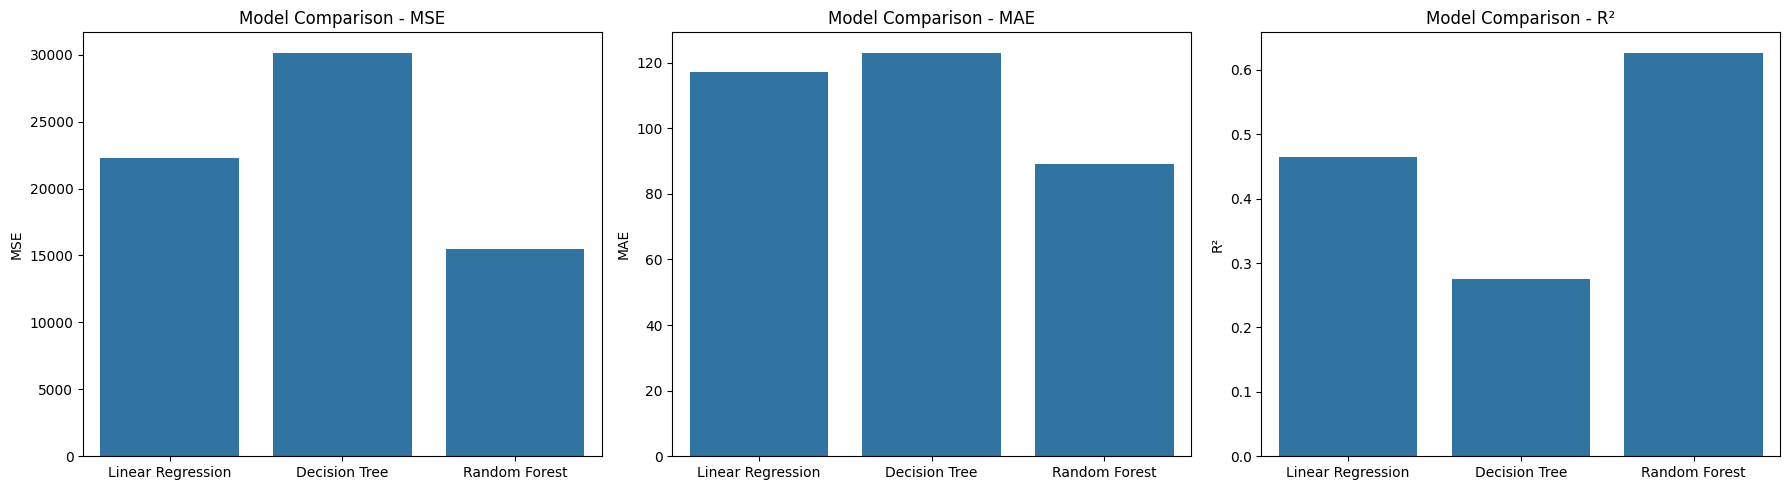

In [ ]:
metrics = ['MSE', 'MAE', 'R²']
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5))

metric_df = pd.DataFrame({'MSE': MSE, 'R²': R2, 'MAE': MAE})

for i, m in enumerate(metrics):
    sns.barplot(x=list(metric_df.index), y=list(metric_df[m]), ax=axes[i])
    axes[i].set_ylabel(m)
    axes[i].set_title(f"Model Comparison - {m}")
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## **Final Result**

In [ ]:
best_model_name = min(MSE, key=MSE.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}\n MSE: {MSE[best_model_name]:.4f}\n R2: {R2[best_model_name]:.4f}\n MAE: {MAE[best_model_name]:.4f}")


Best Model: Random Forest
 MSE: 15511.6998
 R2: 0.6270
 MAE: 89.0394


## **Save the Model**

In [ ]:
filename = f"{best_model_name.replace(' ', '_').lower()}_CF_model_02.pkl"
joblib.dump(best_model, filename)
print(f"Model saved as: {filename}")

Model saved as: random_forest_CF_model_02.pkl
